<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/EXAMNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
!pip install pandas scikit-learn
!pip install pymorphy3
!pip install -U pymorphy3-dicts-ru
!pip install umap-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1014c288fbb065c12484b4e9a487a871ff98c7ffd1f6ee04d0cfd0829c6500cd
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [165]:
!pip install ydata-profiling

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy

In [172]:
df = pd.read_excel("/content/April_9.xlsx")

df = df.drop(df.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
df = df.drop(axis=1, columns="Результаты поискового запроса")
df = df.rename(columns={"Unnamed: 1": "Номер Документа", "Unnamed: 2": "Дата регистрации",
              "Unnamed: 3": "Исх. № Дата", "Unnamed: 4": "Адресат",
              "Unnamed: 5": "Автор", "Unnamed: 6": "Краткое содержание",
              "Unnamed: 7": "Примечание"}).copy()
df["Дата регистрации"] = df["Дата регистрации"].astype(str).str[:10]
df["Дата регистрации"] = pd.to_datetime(df["Дата регистрации"])

df["Дата регистрации"] = df["Дата регистрации"].dt.strftime("%d.%m.%Y")

df["Исх. № Дата"] = df["Исх. № Дата"].astype(str).replace(r'\n',' ', regex=True)
df = df.drop(columns="Примечание", axis=1).copy()
df = df.dropna().copy()
df

,Номер Документа,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание
10,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
11,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
12,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
13,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
14,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...,...,...,...
4971,WSR/1.-1750/2017,01.11.2017,06-1333 10.10.2017,Уразов Р.Н.,Черноскутова И.А. (Министерство образования и ...,О заседании рабочей группы приоритетного проек...
4972,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4973,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4974,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


Файл был преобразован для большей читаемости, удалены лишнее 00:00:00 время из даты регистрации, \n из "Исх. № Дата", удалено примечание, так как там большинство значений - NaN.

Значимыми для нас атрибутами являются автор и краткое содержание. Дата и номер не имеет для нас значения.

In [173]:
#df[["Исх. №"]] = df["Исх. № Дата"].str.rsplit(' ').str[0]
df2 = df["Автор"].str.split(' (', 1, expand=True, regex=False)
df2 = df2.rename(columns={0: "Автор", 1: "Организация"})
df2["Организация"] = df2["Организация"].astype(str).str[:-1]
df.drop(columns="Автор", axis=1)
df["Автор"] = df2["Автор"]
df["Организация"] = df2["Организация"]
df

<ipython-input-173-051ca5884c4d>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2 = df["Автор"].str.split(' (', 1, expand=True, regex=False)


,Номер Документа,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Организация
10,WSR/1-838/2019,09.04.2019,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В.,Вх - О возможности использования сетевого изда...,АО «Интерфакс»
11,WSR/1-837/2019,09.04.2019,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А.,Вх - Об участии в совещании по вопросу доработ...,Министерство просвещения Российской Федерации
12,WSR/1-835/2019,09.04.2019,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е.,Вх - О командировании Саликовой К. и Глушко Д....,Администрация Кемеровской области
13,WSR/1-834/2019,09.04.2019,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А.,Вх - Об участии в Чемпионате мира по профессио...,Министерство транспорта Российской Федерации
14,WSR/1-833/2019,09.04.2019,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В.,Вх - Об участии в церемонии открытия Вузовског...,Ставропольский государственный аграрный универ...
...,...,...,...,...,...,...,...
4971,WSR/1.-1750/2017,01.11.2017,06-1333 10.10.2017,Уразов Р.Н.,Черноскутова И.А.,О заседании рабочей группы приоритетного проек...,Министерство образования и науки Российской Фе...
4972,WSR/1.-1749/2017,01.11.2017,11 20.10.2017,Уразов Р.Н.,Медведев Д.А.,Протокол заседания Президиума Совета при Прези...,Аппарат Правительства Российской Федерации
4973,WSR/1.-1751/2017,01.11.2017,ТС-1164/06 31.10.2017,Уразов Р.Н.,Синюгина Т.Ю.,О проведении 21.11.2017 заседания организацион...,Министерство образования и науки РФ. Заместите...
4974,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М.,Протокол заседания рабочей группы приоритетног...,Министерство образования и науки Российской Фе...


In [174]:
df3 = df["Исх. № Дата"].str.split(' ', 1, expand=True, regex=False)
df3 = df3.rename(columns={0: "Исх. №", 1: "Исх. Дата"})
df = df.drop(columns=df.columns[2], axis=1).copy()
df["Исх. Номер"] = df3["Исх. №"]
df["Исх. Дата"] = df3["Исх. Дата"]

<ipython-input-174-8a06a81dcb9c>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3 = df["Исх. № Дата"].str.split(' ', 1, expand=True, regex=False)


In [178]:
new_indices = ["Номер Документа",	"Дата регистрации", "Исх. Номер", "Исх. Дата", "Адресат",	"Автор",	"Организация", "Краткое содержание"]
df = df[new_indices].copy()
df

,Номер Документа,Дата регистрации,Исх. Номер,Исх. Дата,Адресат,Автор,Организация,Краткое содержание
10,WSR/1-838/2019,09.04.2019,208-409,08.04.2019,Уразов Р.Н.,Антонова С.В.,АО «Интерфакс»,Вх - О возможности использования сетевого изда...
11,WSR/1-837/2019,09.04.2019,05-338,09.04.2019,Уразов Р.Н.,Картошкин С.А.,Министерство просвещения Российской Федерации,Вх - Об участии в совещании по вопросу доработ...
12,WSR/1-835/2019,09.04.2019,И10-14/3137,09.04.2019,Уразов Р.Н.,Цивилев С.Е.,Администрация Кемеровской области,Вх - О командировании Саликовой К. и Глушко Д....
13,WSR/1-834/2019,09.04.2019,Д2/7121-ИС,03.04.2019,Иванюк Л.А.,Волков Г.А.,Министерство транспорта Российской Федерации,Вх - Об участии в Чемпионате мира по профессио...
14,WSR/1-833/2019,09.04.2019,15-20/06-911,08.04.2019,Уразов Р.Н.,Атанов И.В.,Ставропольский государственный аграрный универ...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...,...,...,...,...,...
4971,WSR/1.-1750/2017,01.11.2017,06-1333,10.10.2017,Уразов Р.Н.,Черноскутова И.А.,Министерство образования и науки Российской Фе...,О заседании рабочей группы приоритетного проек...
4972,WSR/1.-1749/2017,01.11.2017,11,20.10.2017,Уразов Р.Н.,Медведев Д.А.,Аппарат Правительства Российской Федерации,Протокол заседания Президиума Совета при Прези...
4973,WSR/1.-1751/2017,01.11.2017,ТС-1164/06,31.10.2017,Уразов Р.Н.,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,О проведении 21.11.2017 заседания организацион...
4974,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,None,Уразов Р.Н.,Огородова Л.М.,Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...


Колонка "Исх. № Дата" разделена на "Исходный номер" и "Исходная дата", колонка "Автор" разделена на "Автор" и "Организация". Для удобства колонки были отсортированы.

In [196]:
df["Должность адресата"] = "Другой"
df.loc[df["Организация"].str.contains(r'^(.*?(\Министерство\b)[^$]*)$'), "Должность адресата"] = "Генеральный директор"
df

<ipython-input-196-94ee7f05186a>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df["Организация"].str.contains(r'^(.*?(\Министерство\b)[^$]*)$'), "Должность адресата"] = "Генеральный директор"


,Номер Документа,Дата регистрации,Исх. Номер,Исх. Дата,Адресат,Автор,Организация,Краткое содержание,Должность адресата
10,WSR/1-838/2019,09.04.2019,208-409,08.04.2019,Уразов Р.Н.,Антонова С.В.,АО «Интерфакс»,Вх - О возможности использования сетевого изда...,Другой
11,WSR/1-837/2019,09.04.2019,05-338,09.04.2019,Уразов Р.Н.,Картошкин С.А.,Министерство просвещения Российской Федерации,Вх - Об участии в совещании по вопросу доработ...,Генеральный директор
12,WSR/1-835/2019,09.04.2019,И10-14/3137,09.04.2019,Уразов Р.Н.,Цивилев С.Е.,Администрация Кемеровской области,Вх - О командировании Саликовой К. и Глушко Д....,Другой
13,WSR/1-834/2019,09.04.2019,Д2/7121-ИС,03.04.2019,Иванюк Л.А.,Волков Г.А.,Министерство транспорта Российской Федерации,Вх - Об участии в Чемпионате мира по профессио...,Генеральный директор
14,WSR/1-833/2019,09.04.2019,15-20/06-911,08.04.2019,Уразов Р.Н.,Атанов И.В.,Ставропольский государственный аграрный универ...,Вх - Об участии в церемонии открытия Вузовског...,Другой
...,...,...,...,...,...,...,...,...,...
4971,WSR/1.-1750/2017,01.11.2017,06-1333,10.10.2017,Уразов Р.Н.,Черноскутова И.А.,Министерство образования и науки Российской Фе...,О заседании рабочей группы приоритетного проек...,Генеральный директор
4972,WSR/1.-1749/2017,01.11.2017,11,20.10.2017,Уразов Р.Н.,Медведев Д.А.,Аппарат Правительства Российской Федерации,Протокол заседания Президиума Совета при Прези...,Другой
4973,WSR/1.-1751/2017,01.11.2017,ТС-1164/06,31.10.2017,Уразов Р.Н.,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,О проведении 21.11.2017 заседания организацион...,Генеральный директор
4974,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,None,Уразов Р.Н.,Огородова Л.М.,Министерство образования и науки Российской Фе...,Протокол заседания рабочей группы приоритетног...,Генеральный директор


Так как по условию задания адресатом докуметов от министерств является генеральный директор, были добавлены новые данные.

In [202]:
import os
import pandas as pd
import pymorphy3
from umap import UMAP
import seaborn as sns
import numpy as np


In [201]:
stop_words = []
with open('./stop_words.txt') as f:
    stop_words = [item.replace('\n', '') for item in f.readlines()]
stop_words = set(stop_words)

In [217]:
import re
symbols_to_drop = set(('(', ')', '.', ',', '?', '!', '«', '»', '—', '-', '’', '…', '(', ')', '’', '–', '"'))

morph = pymorphy3.MorphAnalyzer()

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text)

data = df[["Адресат", "Автор", "Краткое содержание", "Организация"]].copy()
data["НФ_крат"] = "А"
data["НФ_орг"] = "Б"
for index, item in data.iterrows():
  item['Краткое содержание'] = item['Краткое содержание'].lower().strip()
  item['Организация'] = item['Организация'].lower().strip()

  item['Краткое содержание'] = item['Краткое содержание'].replace('\xa0', ' ')
  item['Организация'] = item['Организация'].replace('\xa0', ' ')

  item['Краткое содержание'] = item['Краткое содержание'].replace('\u2005', ' ')
  item['Организация'] = item['Организация'].replace('\u2005', ' ')

  item['Краткое содержание'] = item['Краткое содержание'].replace('\n', ' ')
  item['Организация'] = item['Организация'].replace('\n', ' ')

  for symbol in symbols_to_drop:
    item['Краткое содержание'] = item['Краткое содержание'].replace(symbol, ' ')
    item['Организация'] = item['Организация'].replace(symbol, ' ')

  item['Краткое содержание'] = remove_extra_spaces(item['Краткое содержание'])
  item['Организация'] = remove_extra_spaces(item['Организация'])

  item['Краткое содержание'] = ' '.join([word for word in item['Краткое содержание'].split(' ') if word not in stop_words])
  item['Организация'] = ' '.join([word for word in item['Организация'].split(' ') if word not in stop_words])

  item['НФ_крат'] = ' '.join([morph.parse(word)[0].normal_form for word in item['Краткое содержание'].split(' ')])
  item['НФ_орг'] = ' '.join([morph.parse(word)[0].normal_form for word in item['Организация'].split(' ') if word not in stop_words or len(word) < 2])

In [218]:
data

,Адресат,Автор,Краткое содержание,Организация,НФ_крат,НФ_орг
10,Уразов Р.Н.,Антонова С.В.,вх возможности использования сетевого издания ...,ао интерфакс,вх возможность использование сетевой издание и...,ао интерфакс
11,Уразов Р.Н.,Картошкин С.А.,вх участии совещании вопросу доработки фэо пре...,министерство просвещения российской федерации,вх участие совещание вопрос доработка фэо пред...,министерство просвещение российский федерация
12,Уразов Р.Н.,Цивилев С.Е.,вх командировании саликовой глушко д участия з...,администрация кемеровской области,вх командирование саликов глушко далее участие...,администрация кемеровский область
13,Иванюк Л.А.,Волков Г.А.,вх участии чемпионате профессиональному мастер...,министерство транспорта российской федерации,вх участие чемпионат профессиональный мастерст...,министерство транспорт российский федерация
14,Уразов Р.Н.,Атанов И.В.,вх участии церемонии открытия вузовского чемпи...,ставропольский государственный аграрный универ...,вх участие церемония открытие вузовский чемпио...,ставропольский государственный аграрный универ...
...,...,...,...,...,...,...
4971,Уразов Р.Н.,Черноскутова И.А.,заседании рабочей группы приоритетного проекта...,министерство образования науки российской феде...,заседание рабочий группа приоритетный проект р...,министерство образование наука российский феде...
4972,Уразов Р.Н.,Медведев Д.А.,протокол заседания президиума совета президент...,аппарат правительства российской федерации,протокол заседание президиум совет президент р...,аппарат правительство российский федерация
4973,Уразов Р.Н.,Синюгина Т.Ю.,проведении 21 11 2017 заседания организационно...,министерство образования науки рф заместитель ...,проведение 21 11 2017 заседание организационны...,министерство образование наука рф заместитель ...
4974,Уразов Р.Н.,Огородова Л.М.,протокол заседания рабочей группы приоритетног...,министерство образования науки российской феде...,протокол заседание рабочий группа приоритетный...,министерство образование наука российский феде...


Проведена первоначальная обработка текста.

In [219]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer


corpus1 = data['НФ_крат'].to_list()
corpus2 = data['НФ_орг'].to_list()
count_vectorizer = CountVectorizer()
hashing_vectorizer = HashingVectorizer(n_features=1000)
tfidf_vectorizer = TfidfVectorizer()

In [221]:
tfidf1_vectorizer = tfidf_vectorizer.fit_transform(corpus1)
tfidf2_vectorizer = tfidf_vectorizer.fit_transform(corpus2)

In [224]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

X_embedded1 = UMAP(n_components=10, n_neighbors=4, random_state=42, n_jobs=1).fit_transform(tfidf1_vectorizer)
X_embedded2 = UMAP(n_components=10, n_neighbors=4, random_state=42, n_jobs=1).fit_transform(tfidf2_vectorizer)

X_embedded_visual1 = UMAP(n_components = 2, n_neighbors=4, random_state=42, n_jobs=1).fit_transform(tfidf1_vectorizer)
X_embedded_visual2 = UMAP(n_components = 2, n_neighbors=4, random_state=42, n_jobs=1).fit_transform(tfidf2_vectorizer)
X_embedded1[:5]
X_embedded_visual1[:5]

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


array([[ 5.7619405 ,  9.358956  ],
       [ 0.6157254 ,  0.37505683],
       [ 4.5045905 ,  2.7368886 ],
       [14.570051  ,  3.9227157 ],
       [ 1.3618298 ,  4.053326  ]], dtype=float32)

<Axes: >

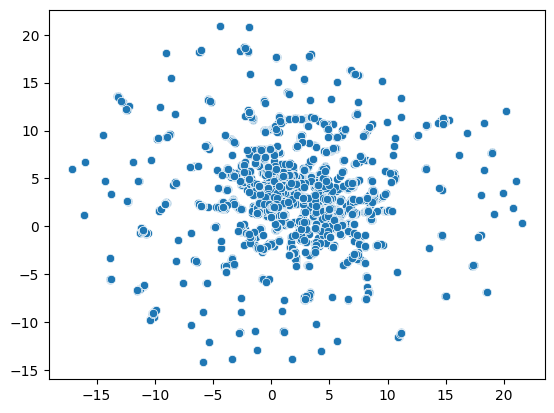

In [226]:

sns.scatterplot(x=X_embedded_visual1[:, 0], y=X_embedded_visual1[:, 1])

В корпусе есть часто встречающиеся слова.

In [227]:
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(tfidf1_vectorizer)
    score = silhouette_score(tfidf1_vectorizer, kmeans.labels_)
    kmeans_scores.append(score)

print(kmeans_scores)

[0.010664370529126081, 0.016053970312649796, 0.022857073790870513, 0.02585871083201195, 0.02886389686518677, 0.033112960309294344, 0.038506265835437495, 0.04084835191362856]


[0.17726761, 0.17721276, 0.18163817, 0.19792405, 0.21233074, 0.22055998, 0.23885588, 0.2499614, 0.23695962, 0.26932502, 0.22878958, 0.20924819, 0.24477942]


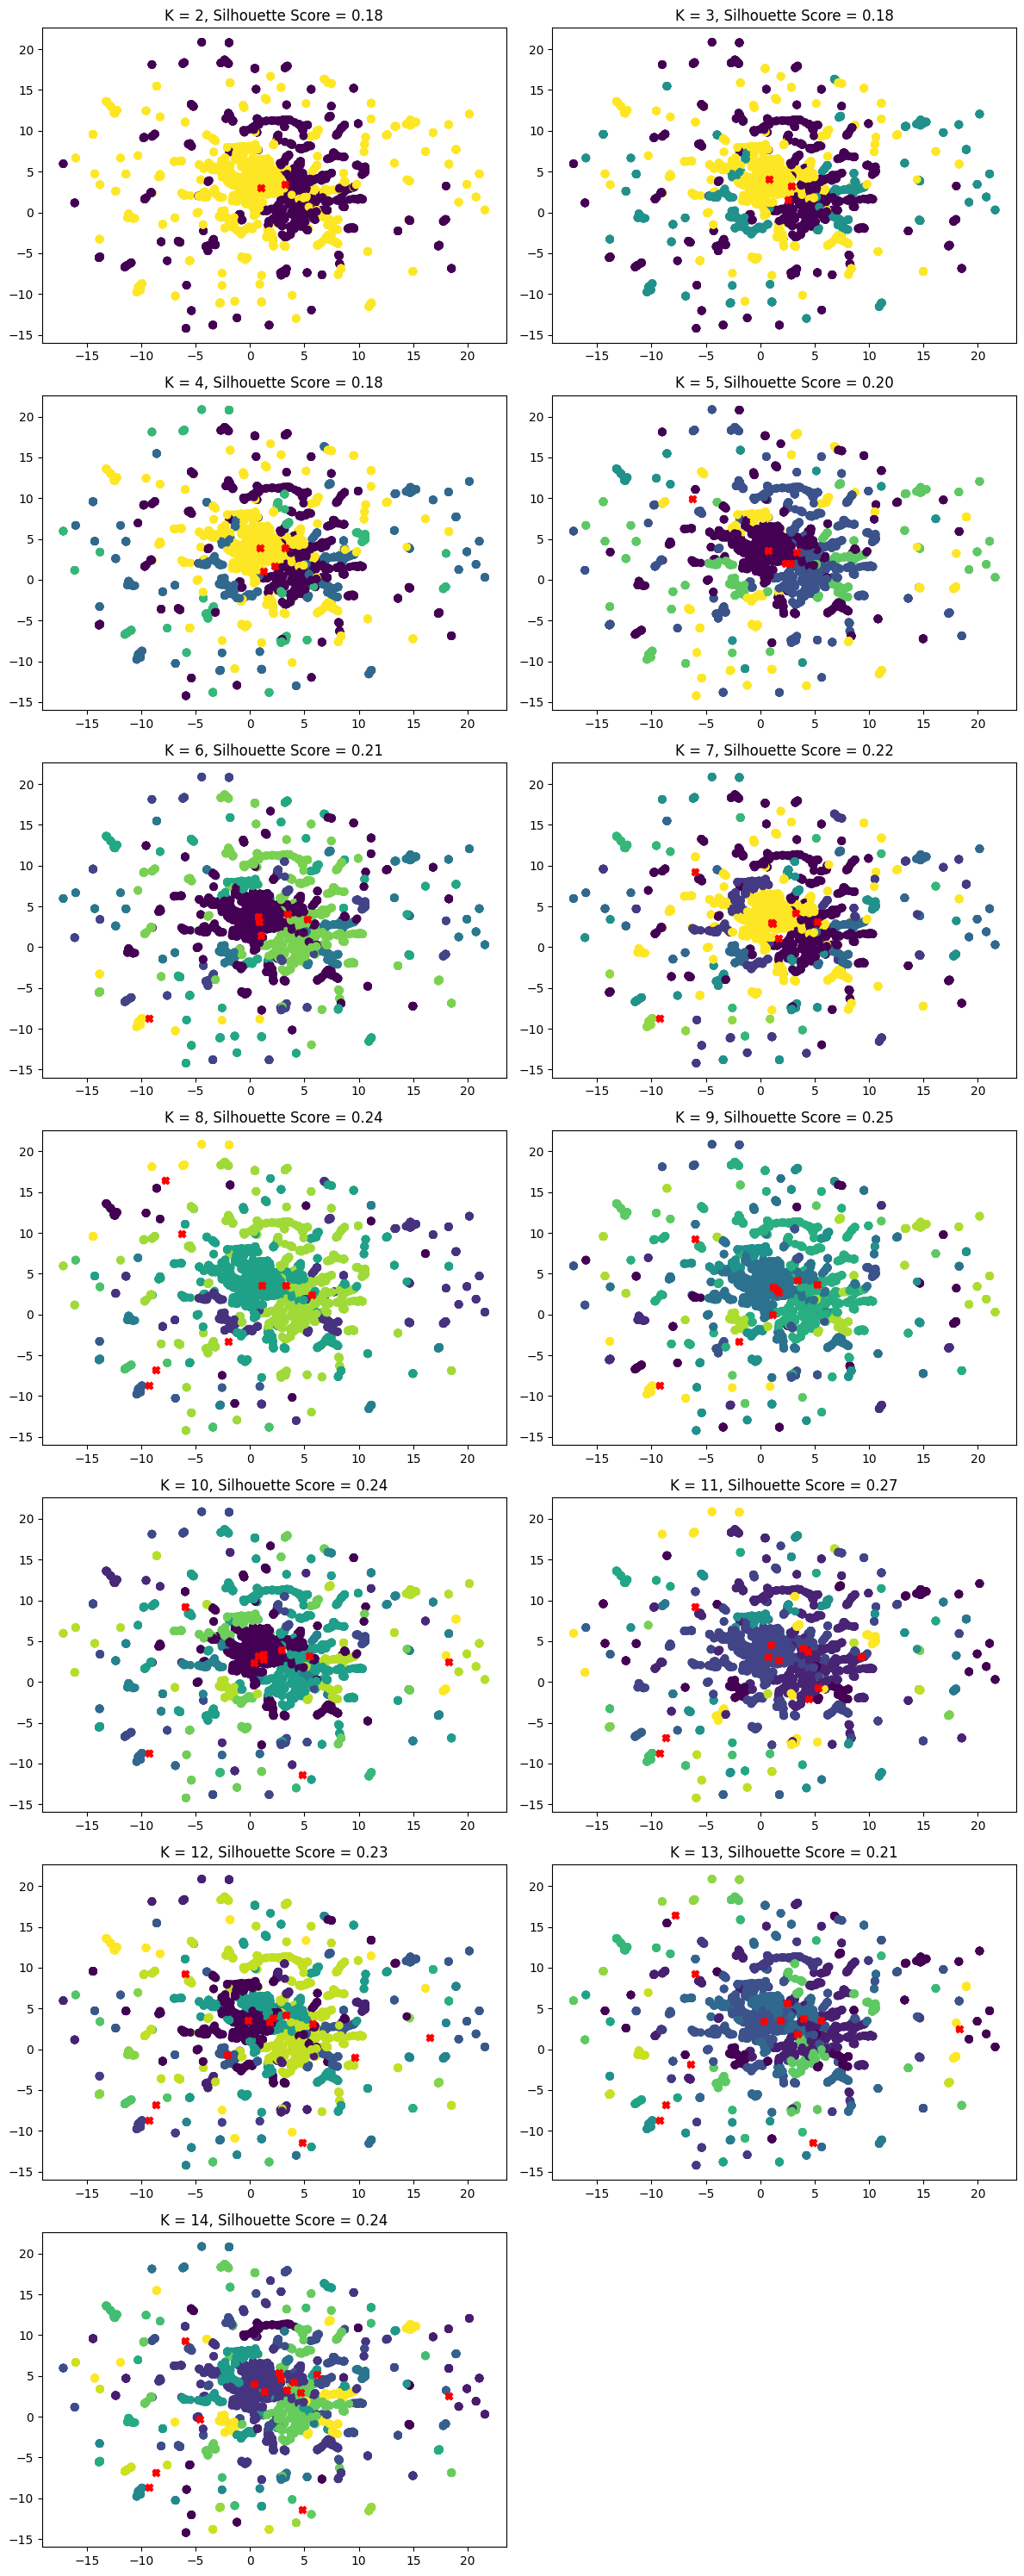

In [228]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

fig, axes = plt.subplots(7, 2, figsize=(12, 30))
axes = axes.ravel()

fig.delaxes(axes[-1])

scores = []
for i, k in enumerate(range(2, 15)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_embedded1)

    # Рассчет silhouette score
    score = silhouette_score(X_embedded1, kmeans.labels_)
    scores.append(score)
    # Визуализация
    cluster_centers_visual = np.array([X_embedded_visual1[kmeans.labels_ == label].mean(axis=0) for label in np.unique(kmeans.labels_)])

    axes[i].scatter(X_embedded_visual1[:, 0], X_embedded_visual1[:, 1], c=kmeans.labels_, cmap='viridis')
    axes[i].scatter(cluster_centers_visual[:, 0], cluster_centers_visual[:, 1], c='red', marker='X')

    for center in cluster_centers_visual:
        circle= Circle(center, radius=0.2, fill=False, linestyle='-', linewidth=2, edgecolor='red')
        axes[i].add_artist(circle)

    axes[i].set_title(f'K = {k}, Silhouette Score = {score:.2f}')

print(scores)

optimal_cluster_k = scores.index(max(scores)) + 2

plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(df["Flavanoids"], df["Nonflavanoid_Phenols"])
plt.xlabel('Содержание флавоноидов')
plt.ylabel('Содержание нефлавоноидных фенолов')
plt.title('Распределение данных в двумерном пространстве')

Вычисляем метрики

In [ ]:
# Нормализация данных
X = df[["Flavanoids", "Nonflavanoid_Phenols"]]
x_scaled = StandardScaler().fit_transform(X)

Silhouette Score

In [ ]:
# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Методом научного тыка выяснено, что балл выше 0.5 по метрике Silhouette Score дают колонки "Flavanoids", "Nonflavanoid_Phenols". Оптимальное число кластеров для KMeans - 2.


Calinski Harabasz Index

In [ ]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = calinski_harabasz_score(x_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Davies Bouldin Index

In [ ]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = davies_bouldin_score(x_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

Normalized Mutual Information Index не будет в виду отсутствия дискретных значений в датасете.

Ищем оптимальное EPS для DBSCAN

In [ ]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(x_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(x_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

Итого: оптимальный EPS - 0.26771799042668415, Ожидаемое количество кластеров - 2.

KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers)
print(cluster_labels)

In [ ]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


plt.scatter(df["Flavanoids"], df["Nonflavanoid_Phenols"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Содержание флавоноидов')
plt.ylabel('Содержание нефлавоноидных фенолов')
plt.title('Результаты кластеризации K-Means')
plt.show()

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.2677, min_samples=5)
dbscan.fit(x_scaled)

labels = dbscan.labels_

labels

In [ ]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

Иерархическая кластеризация

In [ ]:
# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X)

# Визуализация дендрограммы

linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним


df['kmeans_cluster'] = kmeans.labels_
df['dbsscan_cluster'] = dbscan.labels_

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)

#P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport

df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))




# 3. Выполните профилирование

#На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма
'''

profile_dbscan0 = ProfileReport(df[df.dbscan_labels == 0])
profile_dbscan1 = ProfileReport(df[df.dbscan_labels == 1])
profile_dbscan2 = ProfileReport(df[df.dbscan_labels == 2])

profile_dbscan0.to_file("profile_dbscan0.html")
profile_dbscan1.to_file("profile_dbscan1.html")
profile_dbscan2.to_file("profile_dbscan2.html")
'''

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".


**Результаты профилирования**

В первом кластере DBSCAN оказалось 93 строки. По большинству переменных обнаружены близкие значения (от 20% до 75%). В колонках Malic Acid, Ash, ASh Aclanity, Magnesium, Color Intensity, Proline встречается по одному нулевому значению, возможно они относятся к одной строке (поврежденной). Также по Heatmap можно увидеть сравнительно высокую корреляцию (как положительную, так и отрицательную) различных переменных. Меньше всего подвержена корреляции колонка Hue. В этом кластере можно увидеть, что содержание алкаголя растет вместе с содержанием флаваноидов, пролина и интенсивностью цвета.

2 кластер: сюда попало 8 строк. Большинство колонок отсюда имеют неповторяющиеся значения и сильную корреляцию. Анализ информации по нему затруднен.

3 кластер: здесь 29 строк. Здесь наблюдается довольно низкая корреляция содержания алкаголя с другими характеристиками. Диапазон значений алкаголя уже, чем в первом кластере, но по гистограмме видно распределение, меньше напоминающее нормальное.